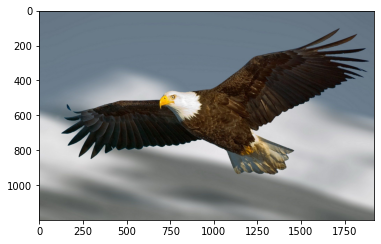

In [7]:
# from google.colab import drive
# drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# membaca gambar
eagle = cv2.imread('/content/drive/MyDrive/birds/eagle.jpeg')

# ubah warna ke RGB(dari BGR)
eagle = cv2.cvtColor(eagle, cv2.COLOR_BGR2RGB)

# tampilkan gambar
plt.imshow(eagle)

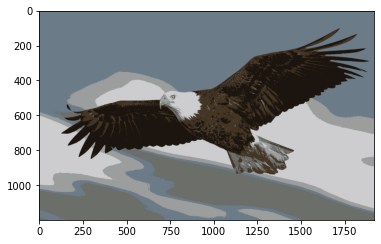

In [8]:
# Menyiapkan data untuk K-Means

# Membentuk kembali gambar menjadi array 2D agar Clustering K-Means dapat dilakukan
pixel_vals = eagle.reshape((-1,3))

# Ubah ke tipe float
pixel_vals = np.float32(pixel_vals)

# Menentukan kriteria agar algoritme berhenti berjalan, 
# yang akan terjadi adalah 100 iterasi dijalankan atau epsilon (yang merupakan akurasi yang diperlukan) menjadi 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

# Kemudian melakukan k-means clustering 
# dengan jumlah cluster yang didefinisikan sebagai 3 juga pusat acak pada awalnya dipilih untuk pengelompokan k-means
k = 6
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# mengubah data menjadi nilai 8-bit
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# membentuk kembali data ke dalam dimensi gambar asli
segmented_image = segmented_data.reshape((eagle.shape))

plt.imshow(segmented_image)